# 5565 Assignment #1 - David Wagner

### Ch. 2 Conceptual

#### 2.4.1

For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.

(a) The sample size *n* is extremely large, and the number of predictors *p* is small.

With large **n** a flexible model would be able to fit the data. With more degrees of freedom you need more samples to approximate a good fit.

(b) The number of predictors *p* is extremely large, and the number
of observations *n* is small.

Less samples usually is better fit by a model with less degrees of freedom so not a flexible model. A large flexibile model would have a higher chance of overfitting to the small amount of data and large number of predictors compared to a simpler model.

(c) The relationship between the predictors and response is highly
non-linear.

A flexible method is better for non-linear relationships as the more complicated the relationship is between predictors and response the more degrees of freedom, or flexibility, you will need in a model in order to approximate that relationship.

(d) The variance of the error terms, i.e. $\sigma^2$ = Var($\epsilon$), is extremely
high.

If the irreducible error is extremely high a more flexible model would potentially overfit the error in the data while a simpler model would have a better fit.

#### 2.4.2

Explain whether each scenario is a classification or regression problem,
and indicate whether we are most interested in inference or prediction.
Finally, provide *n* and *p*.

(a) We collect a set of data on the top 500 firms in the US. For each
firm we record profit, number of employees, industry and the
CEO salary. We are interested in understanding which factors
affect CEO salary.

This is a regression problem interesting in inference.
$n = 500$
$p = 3$

(b) We are considering launching a new product and wish to know
whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each product
we have recorded whether it was a success or failure, price
charged for the product, marketing budget, competition price,
and ten other variables.

This is a classification problem interested in prediction.
$n = 20$
$p = 14$

(c) We are interested in predicting the % change in the USD/Euro
exchange rate in relation to the weekly changes in the world
stock markets. Hence we collect weekly data for all of 2012. For
each week we record the % change in the USD/Euro, the %
change in the US market, the % change in the British market,
and the % change in the German market.

This is a regression problem interested in prediction.
$n = 52$
$p = 4$

#### 2.4.7

The table below provides a training data set containing six observations,
three predictors, and one qualitative response variable.

```
Obs. X1 X2 X3 Y
 1    0  3  0 Red
 2    2  0  0 Red
 3    0  1  3 Red
 4    0  1  2 Green
 5   −1  0  1 Green
 6    1  1  1 Red
```

In [53]:
X1 <- c(0, 2, 0, 0, -1, 1)
X2 <- c(3, 0, 1, 1, 0, 1)
X3 <- c(0, 0, 3, 2, 1, 1)
X <- data.frame(X1, X2, X3)
Y <- factor(c("Red", "Red", "Red", "Green", "Green", "Red"))
df <- data.frame(X, Y)
df

X1,X2,X3,Y
<dbl>,<dbl>,<dbl>,<fct>
0,3,0,Red
2,0,0,Red
0,1,3,Red
0,1,2,Green
-1,0,1,Green
1,1,1,Red


Suppose we wish to use this data set to make a prediction for $Y$ when
$X1 = X2 = X3 = 0$ using $K$-nearest neighbors.

(a) Compute the Euclidean distance between each observation and
the test point, $X1 = X2 = X3 = 0$.

In [56]:
df$dist <- sqrt(rowSums((X - c(0, 0, 0))^2))
df

X1,X2,X3,Y,dist
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
0,3,0,Red,3.000000
2,0,0,Red,2.000000
0,1,3,Red,3.162278
0,1,2,Green,2.236068
-1,0,1,Green,1.414214
1,1,1,Red,1.732051


(b) What is our prediction with $K = 1$? Why?

In [98]:
k = 1
sorted <- df[order(df$dist),]
neighborhood <- sorted[1:k, ]
proba <- table(neighborhood$Y) / nrow(neighborhood)
proba


Green   Red 
    1     0 

There is only 1 nearest neighbor which is Green so our prediction would be Green.

(c) What is our prediction with $K = 3$? Why?

In [99]:
k = 3
sorted <- df[order(df$dist),]
neighborhood <- sorted[1:k, ]
proba <- table(neighborhood$Y) / nrow(neighborhood)
proba


    Green       Red 
0.3333333 0.6666667 

For 3 nearest neighbors 33% are Green and 67% are Red so the prediction is Red.

(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for $K$ to be large or
small? Why?

TODO

### Ch. 2 Applied

#### 2.4.8

(a) Use the read.csv() function to read the data into R. Call the
loaded data college. Make sure that you have the directory set
to the correct location for the data.

In [25]:
df <- read.csv("https://www.statlearning.com/s/College.csv", stringsAsFactors=TRUE)

(b) Look at the data using the View() function. 

In [26]:
View(head(df))

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


You should notice
that the first column is just the name of each university.We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:
```
> rownames(college) <- college[, 1]
> View(college)
```
You should see that there is now a row.names column with the
name of each university recorded. This means that R has given
each row a name corresponding to the appropriate university. R
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try
```
> college <- college[, -1]
> View(college)
```
Now you should see that the first data column is Private. Note
that another column labeled row.names now appears before the
Private column. However, this is not a data column but rather
the name that R is giving to each row.

In [27]:
rownames(df) <- df[, 1]
df <- df[, -1]
head(df)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


(c) i. Use the summary() function to produce a numerical summary
of the variables in the data set.

In [28]:
summary(df)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

ii. Use the pairs() function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
A[,1:10].

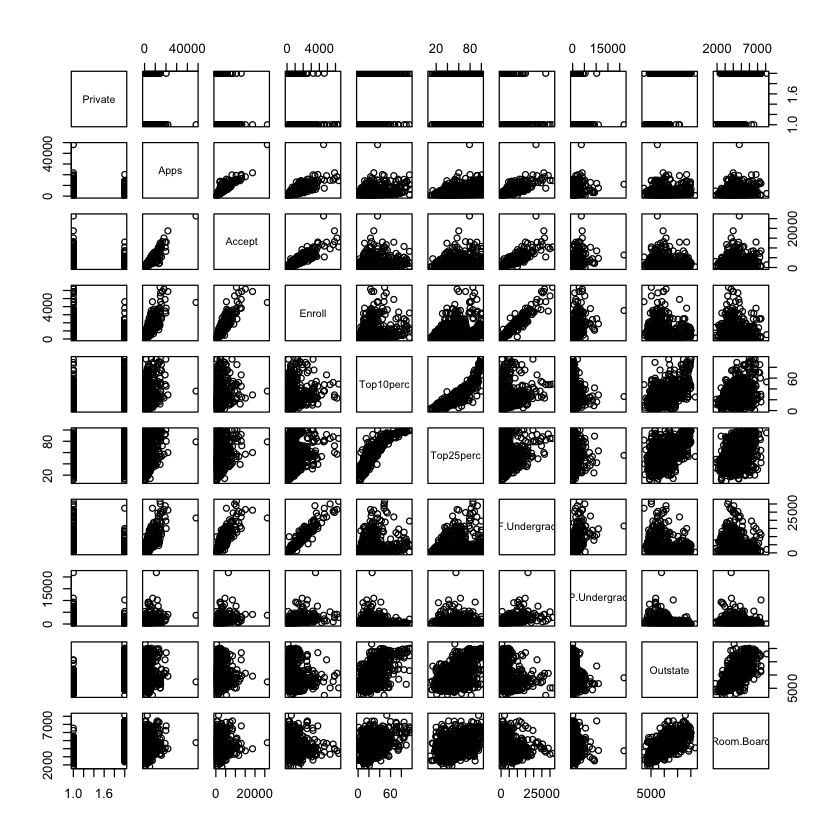

In [31]:
pairs(df[, 1:10])

iii. Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.

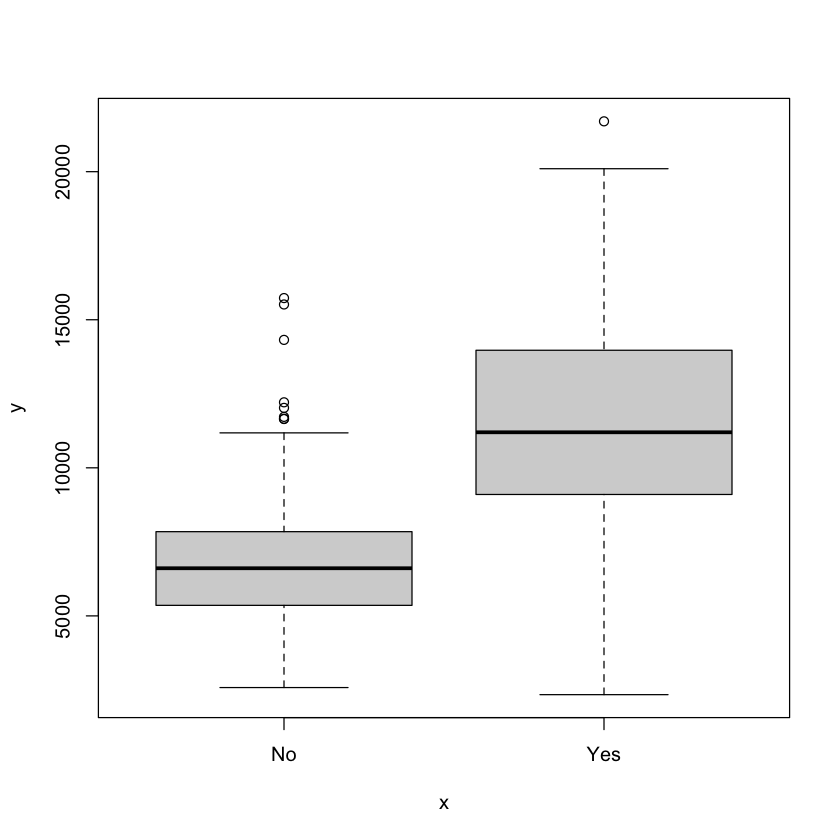

In [37]:
plot(df$Private, df$Outstate)

iv. Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50 %.
```
> Elite <- rep("No", nrow(college))
> Elite[college$Top10perc > 50] <- "Yes"
> Elite <- as.factor(Elite)
> college <- data.frame(college , Elite)
```
Use the summary() function to see how many elite universities
there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

In [40]:
Elite <- rep("No", nrow(df))
Elite[df$Top10perc > 50] <- "Yes"
Elite <- as.factor(Elite)
df$Elite <- Elite
summary(df$Elite)

No Yes 
699  78

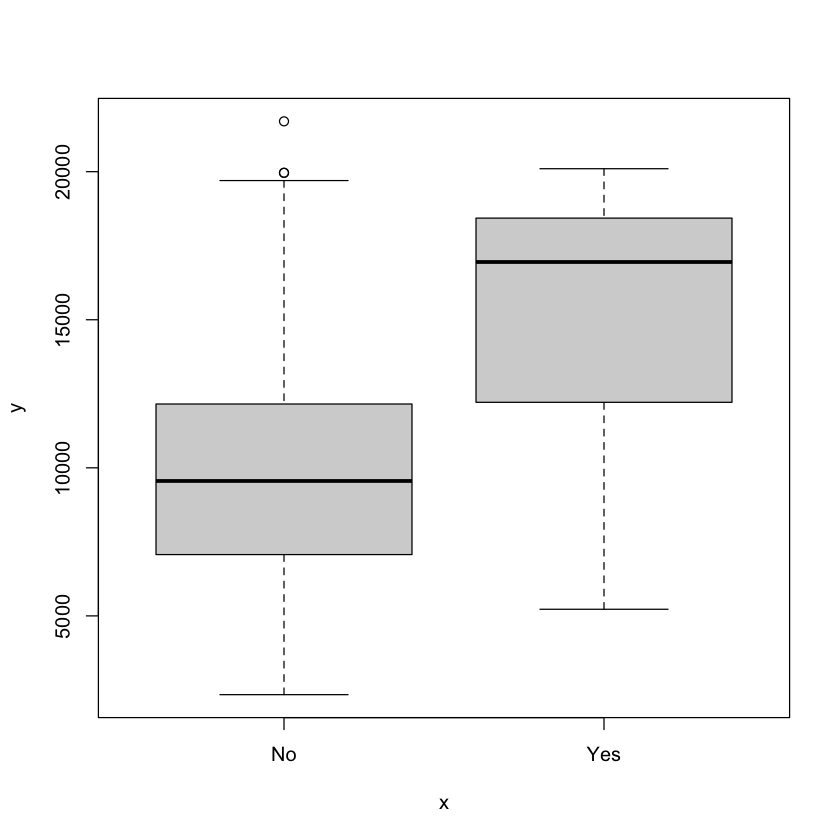

In [42]:
with(df, plot(Elite, Outstate))

v. Use the hist() function to produce some histograms with
differing numbers of bins for a few of the quantitative variables.
You may find the command par(mfrow = c(2, 2))
useful: it will divide the print window into four regions so
that four plots can be made simultaneously. Modifying the
arguments to this function will divide the screen in other
ways.

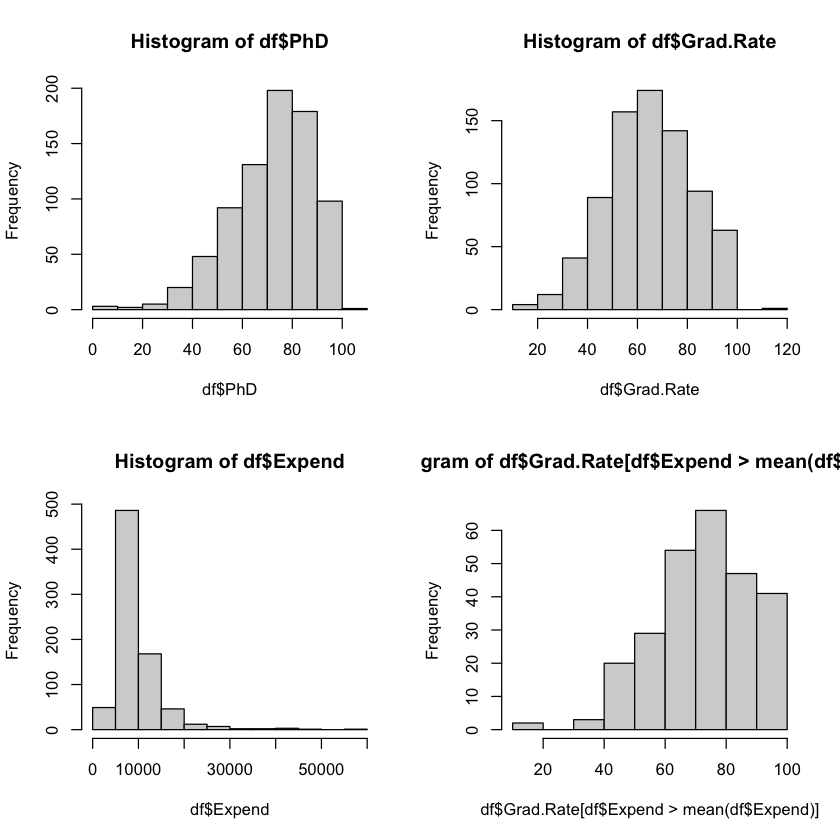

In [49]:
par(mfrow=c(2, 2))
hist(df$PhD)
hist(df$Grad.Rate)
hist(df$Expend)
hist(df$Grad.Rate[df$Expend > mean(df$Expend)])

vi. Continue exploring the data, and provide a brief summary
of what you discover.

TODO

#### 2.4.9

This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

In [70]:
df <- read.table("https://www.statlearning.com/s/Auto.data", header=TRUE, na.strings="?")
df = na.omit(df)
head(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [71]:
colSums(is.na(df))

mpg    cylinders displacement   horsepower       weight acceleration 
           0            0            0            0            0            0 
        year       origin         name 
           0            0            0

(a) Which of the predictors are quantitative, and which are qualitative?

quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year  
qualitiative: origin, name

(b) What is the range of each quantitative predictor? You can answer
this using the range() function.
range()

In [77]:
lapply(df[, 1:7], range)

$mpg
[1]  9.0 46.6

$cylinders
[1] 3 8

$displacement
[1]  68 455

$horsepower
[1]  46 230

$weight
[1] 1613 5140

$acceleration
[1]  8.0 24.8

$year
[1] 70 82

(c) What is the mean and standard deviation of each quantitative
predictor?

In [99]:
data.frame(rbind(mean=sapply(df[, 1:7], mean), std=sapply(df[, 1:7], sd)))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,23.445918,5.471939,194.412,104.46939,2977.5842,15.541327,75.979592
std,7.805007,1.705783,104.644,38.49116,849.4026,2.758864,3.683737


(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [100]:
sub <- df[-c(10:85), 1:7]
data.frame(rbind(mean=sapply(sub, mean), std=sapply(sub, sd)))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,24.404430,5.373418,187.24051,100.72152,2935.9715,15.726899,77.145570
std,7.867283,1.654179,99.67837,35.70885,811.3002,2.693721,3.106217


(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

In [ ]:
TODO

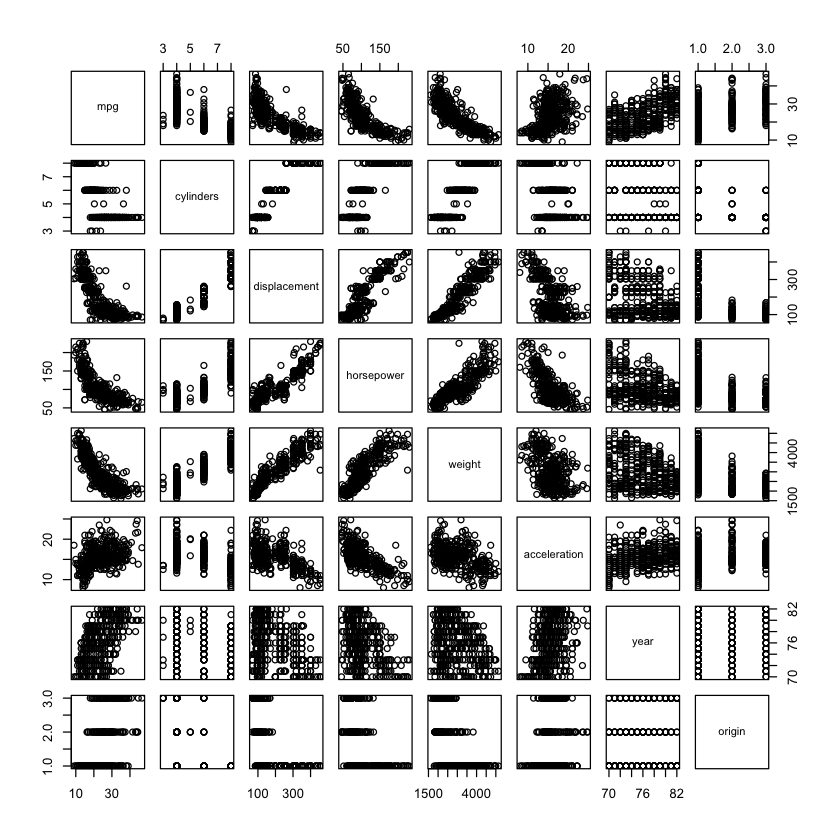

In [113]:
pairs(df[, 1:8])

(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

All of the other predictors seem to have some correlation with `mpg`. Looking at the correlation plot.

#### 2.4.10

This exercise involves the Boston housing data set.

(a) To begin, load in the Boston data set. The Boston data set is
part of the ISLR2 library.
```
> library(ISLR2)
```
Now the data set is contained in the object Boston.
```
> Boston
```
Read about the data set:
```
> ?Boston
```
How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [4]:
df <- read.csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv")

In [6]:
head(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [7]:
dim(df)

[1] 506  14

There are 506 rows and 14 columns in this dataset.

Column information from http://lib.stat.cmu.edu/datasets/boston
```
CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

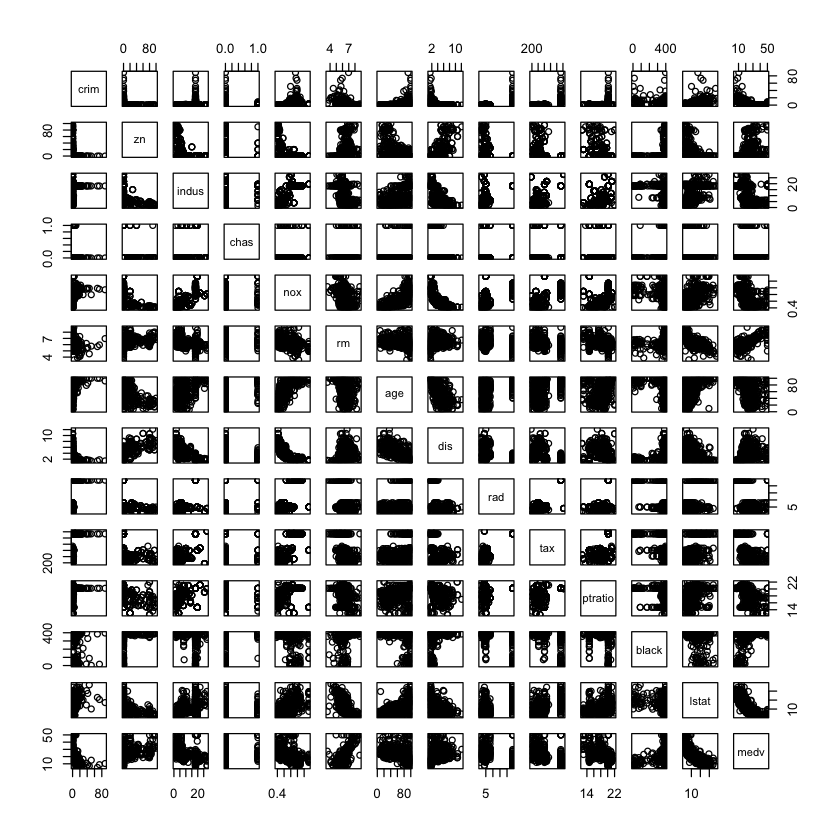

In [8]:
pairs(df)

In [39]:
crim.cor <- data.frame(cor=cor(df)[, 1])
crim.cor[order(crim.cor$cor),, drop=FALSE]

,cor
,<dbl>
medv,-0.38830461
black,-0.38506394
dis,-0.37967009
rm,-0.21924670
zn,-0.20046922
chas,-0.05589158
ptratio,0.28994558
age,0.35273425
indus,0.40658341


(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

The largest correlation is with `tax` and `rad` while other variables are positively and negatively correlated they are to a weaker degree. 

(d) Do any of the census tracts of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

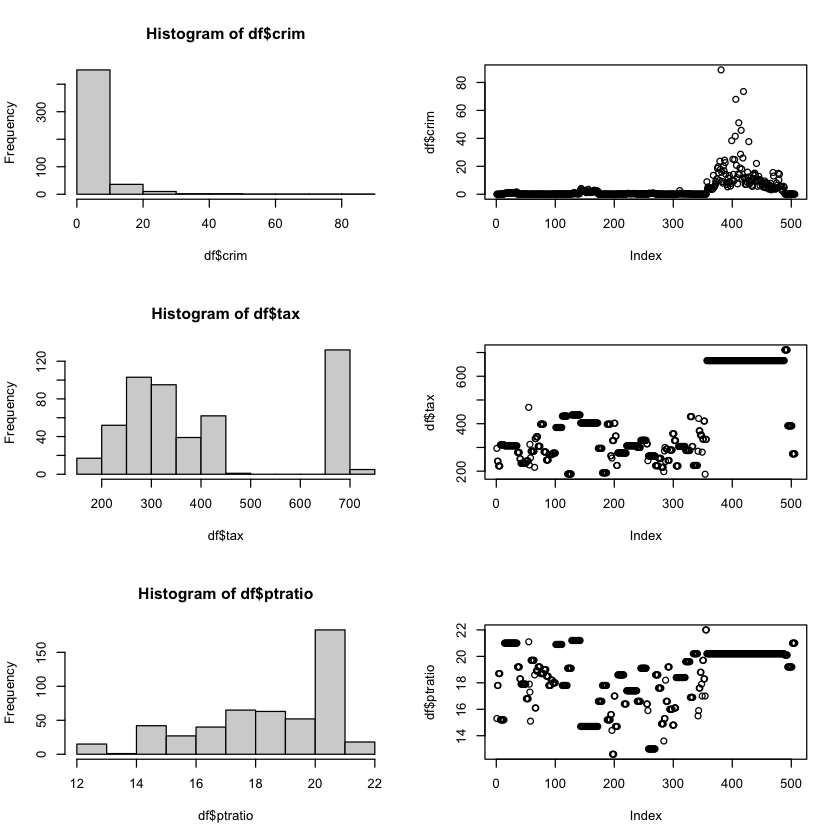

In [53]:
par(mfrow=c(3, 2))
hist(df$crim)
plot(df$crim)
hist(df$tax)
plot(df$tax)
hist(df$ptratio)
plot(df$ptratio)

The `ptratio` seems evenly distributed, `tax` would fit into lower and higher clusters nicely, and `crim` is low in majority of tracs and a minority have moderate to outlier amounts of crime.

In [50]:
sapply(df, range)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
88.97620,100,27.74,1,0.871,8.780,100.0,12.1265,24,711,22.0,396.90,37.97,50


`ptratio` has range from 12.6 to 22, `tax` from 187 to 711 (with large gap in tracts between 450-660), and `crim` from 0.006 to 88.97 with majority below 20.

(e) How many of the census tracts in this data set bound the Charles
river?

In [54]:
sum(df$chas)

[1] 35

35 tracts bound the Charls river.

(f) What is the median pupil-teacher ratio among the towns in this
data set?

In [55]:
median(df$ptratio)

[1] 19.05

(g) Which census tract of Boston has lowest median value of owneroccupied
homes? What are the values of the other predictors
for that census tract, and how do those values compare to the
overall ranges for those predictors? Comment on your findings.

In [58]:
df[order(df$medv),,drop=FALSE][1,]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.9,30.59,5


In [59]:
sapply(df, range)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
88.97620,100,27.74,1,0.871,8.780,100.0,12.1265,24,711,22.0,396.90,37.97,50


In [80]:
round(sapply(df, function(x) ecdf(x)(x[399])) * 100) / 100

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
   0.99    0.74    0.89    0.93    0.86    0.08    1.00    0.06    1.00    0.99 
ptratio   black   lstat    medv 
   0.89    1.00    0.98    0.00

All of the variables are in the very high or low percentile when tract 399 is compared to the rest of the sample distribution.

(h) In this data set, how many of the census tracts average more
than seven rooms per dwelling? More than eight rooms per
dwelling? Comment on the census tracts that average more than
eight rooms per dwelling.

In [87]:
nrow(df[df$rm > 7,])

[1] 64

In [88]:
nrow(df[df$rm > 8,])

[1] 13

In [89]:
sub <- df[df$rm > 8,]
sub

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
98,0.12083,0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
164,1.51902,0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
205,0.02009,95,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.31533,0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
226,0.52693,0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
227,0.38214,0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
233,0.57529,0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
234,0.33147,0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
254,0.36894,22,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8


In [103]:
round(sapply(df, function(x) ecdf(x)(mean(x[as.numeric(rownames(sub))]))) * 100) / 100

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
   0.63    0.75    0.40    0.93    0.54    0.99    0.45    0.54    0.69    0.47 
ptratio   black   lstat    medv 
   0.18    0.36    0.08    0.95

Near max median value, low crim, low `lstat`.

### Ch. 3 Conceptual

#### 3.7.1

Describe the null hypotheses to which the p-values given in Table 3.4
correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of sales, TV,
radio, and newspaper, rather than in terms of the coefficients of the
linear model.

The null hypothesis is that the co-efficient is equal to zero, there is no relationship between the predictor and the response.  

The `newspaper` predictor was not significant so the null hypothesis that is has no relationship to sales is not rejected.

#### 3.7.3

Suppose we have a data set with five predictors,  
$X1 =$ GPA  
$X2 =$ IQ  
$X3 =$ Level (1 for College and 0 for High School)  
$X4 =$ Interaction between GPA and IQ  
$X5 =$ Interaction between GPA and Level  
The response is starting salary after graduation (in thousands
of dollars). Suppose we use least squares to fit the model, and get
$\hat{\beta}_0 = 50, \hat{\beta}_1 = 20, \hat{\beta}_2 = 0.07, \hat{\beta}_3 = 35, \hat{\beta}_4 = 0.01, \hat{\beta}_5 = −10.$

(a) Which answer is correct, and why?

i. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates.

False because co-efficient for college indicator is positive.

ii. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates.

This is true since the effect of the Level is positive for college graduates.

iii. For a fixed value of IQ and GPA, high school graduates earn
more, on average, than college graduates provided that the
GPA is high enough.

True because a very high GPA for college student would have large negative effect in this model.

iv. For a fixed value of IQ and GPA, college graduates earn
more, on average, than high school graduates provided that
the GPA is high enough.

False as a high GPU for college graduate would hav elarge negative effect int his model.

(b) Predict the salary of a college graduate with IQ of 110 and a
GPA of 4.0.

In [138]:
50 + (4.0 * 20) + (110 * 0.07) + (1 * 35) + (4.0 * 110 * 0.01) + (4.0 * 1 * -10)

[1] 137.1

(c) True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.

The effect is potentially small, but whether or not we have evidence for the effect can be provided by the p-values for the estimatated co-efficient.

### Ch. 3 Applied

#### 3.7.8

This question involves the use of simple linear regression on the Auto
data set.

In [104]:
df <- read.table("https://www.statlearning.com/s/Auto.data", header=TRUE, na.strings="?")
df = na.omit(df)
head(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


(a) Use the lm() function to perform a simple linear regression with
mpg as the response and horsepower as the predictor. Use the
summary() function to print the results. Comment on the output.
For example:

In [105]:
model <- lm(mpg ~ horsepower, data=df)
summary(model)


Call:
lm(formula = mpg ~ horsepower, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i. Is there a relationship between the predictor and the response?

Yes.

ii. How strong is the relationship between the predictor and
the response?

The predictor can explain about 60% of the variance in the response.

iii. Is the relationship between the predictor and the response
positive or negative?

Negative.

iv. What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?

In [116]:
predict(model, data.frame(horsepower=98))

1 
24.46708

In [114]:
predict(model, data.frame(horsepower=98), interval="confidence")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [115]:
predict(model, data.frame(horsepower=98), interval="prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


(b) Plot the response and the predictor. Use the abline() function
to display the least squares regression line.

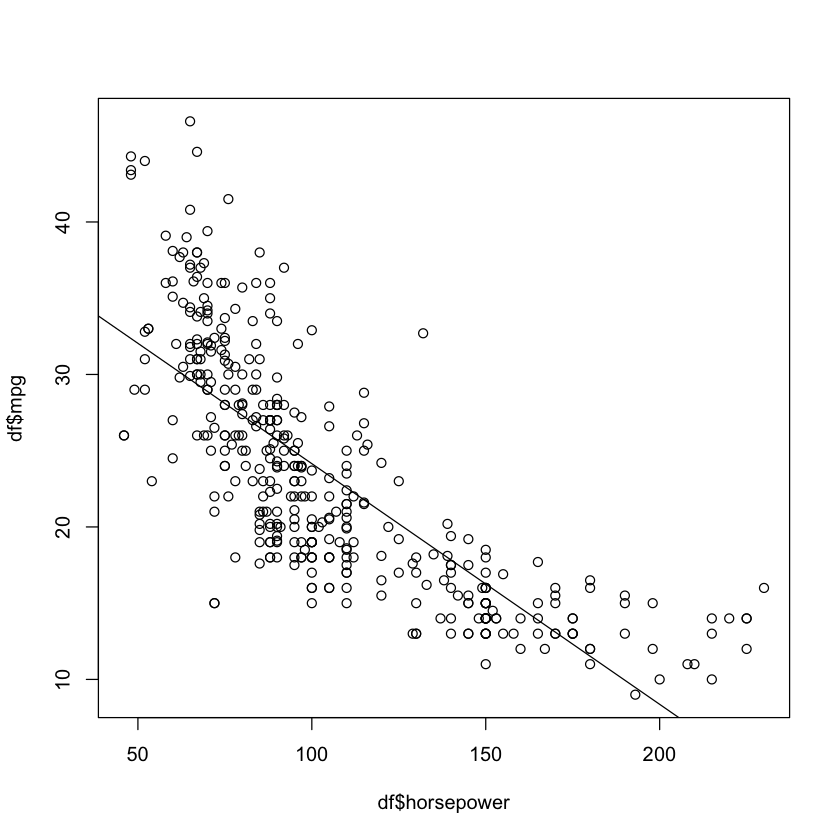

In [121]:
plot(df$horsepower, df$mpg)
abline(model)

(c) Use the plot() function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.

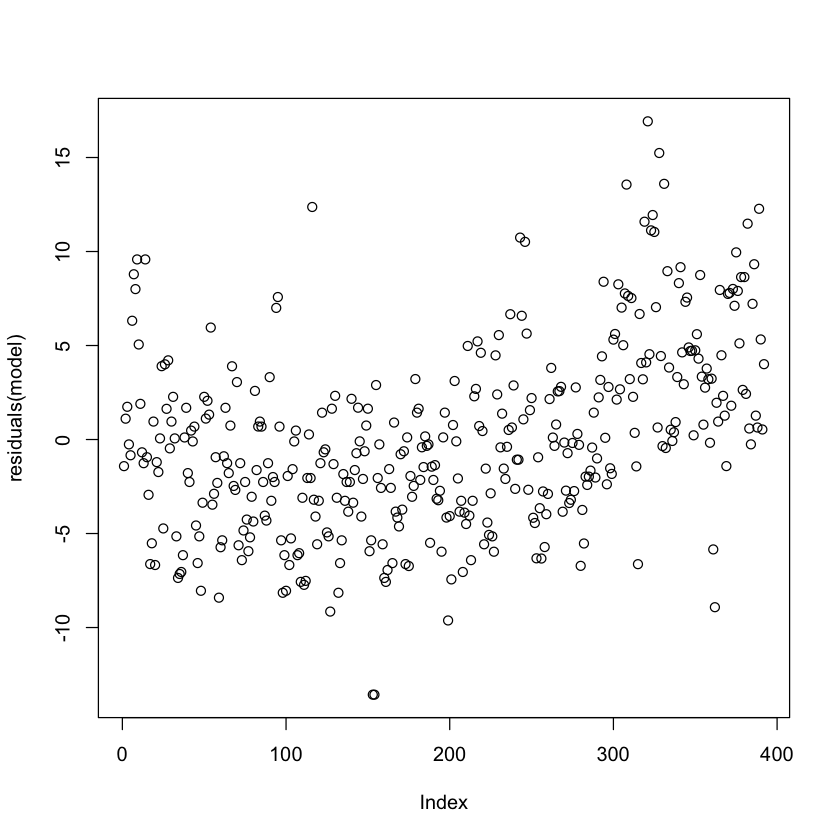

In [122]:
plot(residuals(model))

The residuals seem to have an even variance.

#### 3.7.9

This question involves the use of multiple linear regression on the
Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

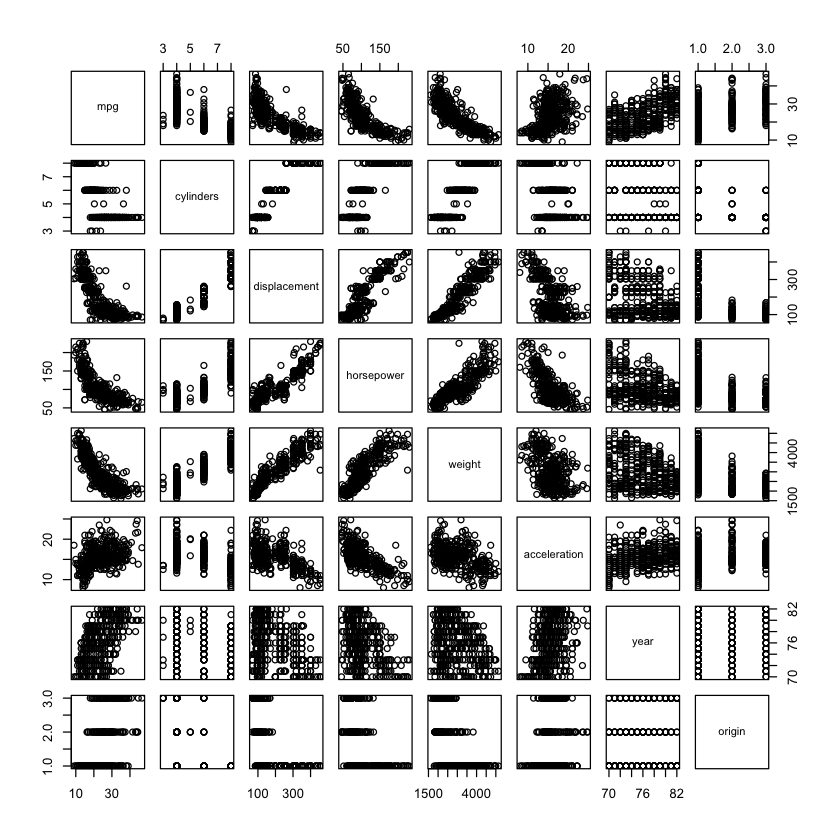

In [126]:
pairs(df[, -9])

(b) Compute the matrix of correlations between the variables using
the function cor(). You will need to exclude the name variable,
cor() which is qualitative.

In [127]:
cor(df[, -9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


(c) Use the lm() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summary() function to print the results.
Comment on the output. For instance:

In [129]:
model <- lm(mpg ~ . -name, data=df)
summary(model)


Call:
lm(formula = mpg ~ . - name, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


A few predictors are not significant.

i. Is there a relationship between the predictors and the response?

The predictors can account for about 82% of the variance in the response. 

ii. Which predictors appear to have a statistically significant
relationship to the response?

displacement, weight, year, and origin

iii. What does the coefficient for the year variable suggest?

Fuel efficiency gets better as car is newer.

(d) Use the plot() function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

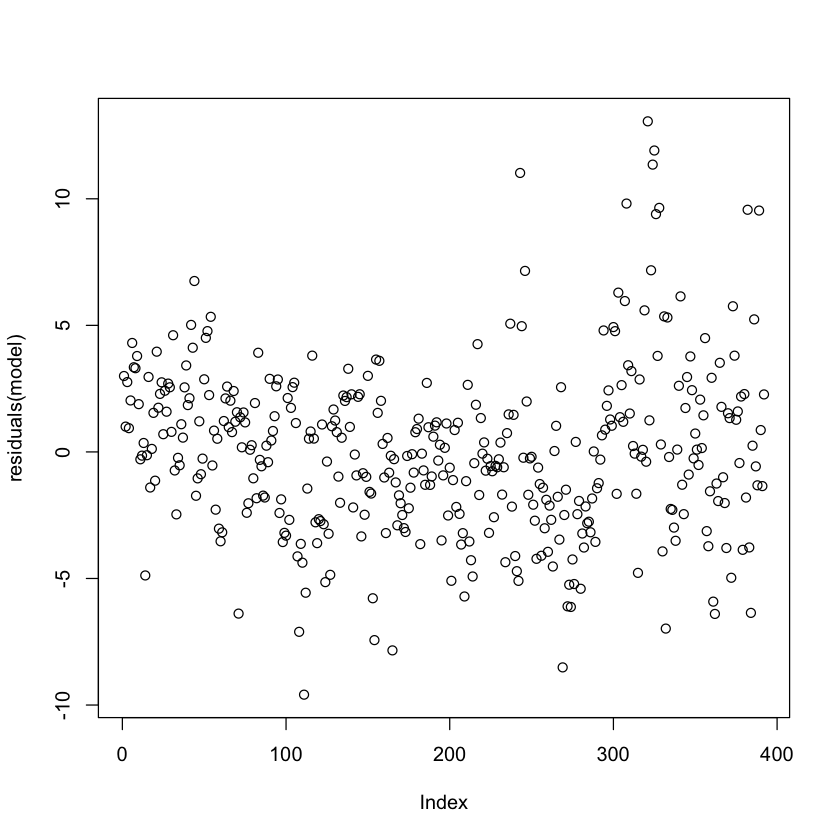

In [131]:
plot(residuals(model))

(e) Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?

In [134]:
model = lm(mpg ~ (. - name)^2, data=df)
summary(model)


Call:
lm(formula = mpg ~ (. - name)^2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6303 -1.4481  0.0596  1.2739 11.1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.548e+01  5.314e+01   0.668  0.50475   
cylinders                  6.989e+00  8.248e+00   0.847  0.39738   
displacement              -4.785e-01  1.894e-01  -2.527  0.01192 * 
horsepower                 5.034e-01  3.470e-01   1.451  0.14769   
weight                     4.133e-03  1.759e-02   0.235  0.81442   
acceleration              -5.859e+00  2.174e+00  -2.696  0.00735 **
year                       6.974e-01  6.097e-01   1.144  0.25340   
origin                    -2.090e+01  7.097e+00  -2.944  0.00345 **
cylinders:displacement    -3.383e-03  6.455e-03  -0.524  0.60051   
cylinders:horsepower       1.161e-02  2.420e-02   0.480  0.63157   
cylinders:weight           3.575e-04  8.955e-04   0.399  0.69000   
cylinders:acceleration  

displacement:year, acceleration:year, and acceleration:origin are all significant.

(f) Try a few different transformations of the variables, such as
$\text{log(X)}, \sqrt{X}, X^2$. Comment on your findings.

In [137]:
model = lm(mpg ~ log(. - name), data=df)
summary(model)

ERROR: Error in eval(predvars, data, env): object '.' not found
